# Lead Scoring Case Study
</hr>

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


## Goal of this Case Study

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Steps to be taken: 

1. Reading and Cleaning the Data
2. EDA and Data Visualization
3. Data Preparation for Model Building
4. Model Preprocessing - Train Test Split, Feature Scaling
5. Model Building & Feature Selection
6. Model Evaluation - Sensitivity, Specificity, ROC Curve
7. Making Predictions on the Test Set 
8. Suggestions 

In [1]:
# Importing the libraries
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
# Data display customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Importing SciKit Learn Libraries 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

#Importing VIF from statsmodel
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 1.1: Reading & Understanding the Data
</hr>

In [2]:
# Reading the file
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Checking the shape of the dataframe
df.shape

(9240, 37)

In [4]:
#checking the info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Checking for Null values
round((df.isnull().sum()/len(df.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
#Looking for duplicates
df.loc[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [8]:
#checking the original conversion rate
ocr = round((sum(df.Converted)/len(df.Converted.index))*100,2)
print(f"The conversion rate as per the original dataset: {ocr} %")

The conversion rate as per the original dataset: 38.54 %


#### Obeservations: 
1. Shape of the Dataset - 9240 Rows and 37 Columns
2. Categorical Variables - 30 & Continuous Variables - 7 
3. `Select` values present in the dataset suggests that the values for those fields have not been selected by the users. 
4. There are 17 columns with Null Values out of which 6 columns have more than 30% of their values missing. 
5. There are no duplicate values. 
6. The original conversion rate from the dataset is 38.54%. 
</hr>

## Step 1.2: Cleaning the Dataset
</hr>

In [9]:
# Dealing with the Select Values
# We will be replacing the Select Values with NaN  values as the user has not made any input for those fields.

df = df.replace("Select", np.nan)

In [10]:
#checking the null values once again
round((df.isnull().sum()/len(df.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

As we can see now that there are a few columns which have more than 70% of their values missing after we dealt with the ***Select*** values. We will be treating them shortly. 

In [11]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [12]:
# we will dropping some redundant columns as they don't seem to give much input to the model
# They only have 1 unique value and no Null values. 
# Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque, Receive More Updates About Our Courses
df = df.drop(['Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [13]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [14]:
# Dropping the Prospect Id Column as it has all unique values and doesn't contribute much to the analysis
df = df.drop('Prospect ID', axis =1) 

In [15]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [16]:
# Treating the Missing Values
# we will be dropping the columns that have atleast 45% of their values missing
round((df.isnull().sum()/len(df.index))*100,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [17]:
# We will be dropping columns - Lead Profile, Lead Quality, Asymmetrique Activity Index, Asymmetrique Profile Index, 
# Asymmetrique Activity Score, Asymmetrique Profile Score, How did you hear about X Education
df.drop(columns=['Lead Profile','Lead Quality','How did you hear about X Education','Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 'Asymmetrique Profile Score'],inplace=True)


In [18]:
round((df.isnull().sum()/len(df.index))*100,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [19]:
# There are still a few columns with more than 30% of their values missing. We will be checking them individually and treating them
# Checking the Country column
df.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [20]:
df.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

Based on the above data 96% of the available data is of country India and 27$ of the data is missing. Hence this column also seems to provide monotonous information and for the same reason we will be dropping it. 

In [21]:
df.drop('Country', inplace=True, axis=1)

In [22]:
# Checking the Specialization Column
df.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [23]:
df.Specialization.value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

1. There are 36% of missing values and according to other values it seems to be the highest, hence replacing these values with any of the present values will not make sense. Hence we will be replacing the NaN values with "Others". 
2. The reason for doing so is that it is possible that have not selected their specialization or they don't have any to begin with. 

In [24]:
df.Specialization = df.Specialization.replace(np.nan, 'Others')

In [25]:
df.Specialization.describe()

count       9240
unique        19
top       Others
freq        3380
Name: Specialization, dtype: object

In [26]:
# Checking the What is your Current Occupation Column
df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [27]:
df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

Almost 85% of the column is 'Unemployed' hence we will be replacing the missing values with the mode of this column. 

In [28]:
mode_1 = df['What is your current occupation'].mode()

In [29]:
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan, 'mode_1')

In [30]:
df['What is your current occupation'].describe()

count           9240
unique             7
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [31]:
#checking the  What matters most to you in choosing a course column 
df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [32]:
df['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

We can see that almost 99.9% of the users have selected 'Better Career Prospects' as the option and almost 30% of the values are missing. Hence we can consider dropping this column as we can now assume that all the users are inclined towards Better Career Prospects according to this column. 

In [33]:
df.drop('What matters most to you in choosing a course', inplace=True, axis=1)

In [34]:
# checking the Tag column 
df.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [35]:
df.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

- Tags column has 36 % of missing values and 35% of values are - Will revert after reading the email 
- These values can change over time and are not very reliable from a historical data review standpoint hence we are dropping this column

In [36]:
df.drop('Tags', inplace=True, axis=1)

In [37]:
#checking the City Column 
df.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [38]:
df.City.value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

- We can see that 58% of the users are from Mumbai hence we will be using mode to replace the missing values here 

In [39]:
df.City = df.City.replace(np.nan, 'Mumbai')

In [40]:
# Now checking the missing values again
round((df.isnull().sum()/len(df.index))*100,2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Magazine                                  0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable 

 - as there is not much missing data left in the other columns, we will just drop the rows with the missing info 

In [41]:
df.dropna(inplace=True)

In [42]:
#Checking null values again
round((df.isnull().sum()/len(df.index))*100,2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Magazine                                  0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity             

Now that we have treated all the missing values we will be doing Exploratory Data Analysis

## Step 2: EDA and Data Visualization
- Univariate and Bivariate Analysis
</hr>

In [43]:
#def function conversion summary to check the conversion rate based on each variable
def conversion(df,column_name):
    convert=df.pivot_table(values='Lead Number',index=column_name ,columns='Converted', aggfunc='count').fillna(0)
    convert["Conversion_Rate(in %)"] = round(convert[1]/(convert[0]+convert[1]),2)*100
    print(convert.sort_values(by="Conversion_Rate(in %)", ascending = False))

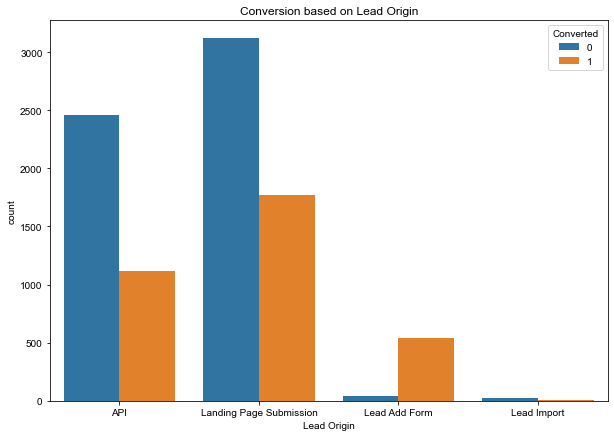

In [44]:
# Lead Origin
plt.figure(figsize=(10,7))
sns.countplot(df['Lead Origin'], hue = df.Converted) 
plt.title("Conversion based on Lead Origin") 
sns.set_theme(style='whitegrid')
plt.show()

In [45]:
conversion(df,'Lead Origin')

Converted                   0     1  Conversion_Rate(in %)
Lead Origin                                               
Lead Add Form              37   544                   94.0
Landing Page Submission  3118  1767                   36.0
API                      2463  1115                   31.0
Lead Import                21     9                   30.0


### Summary: 
- We can see that `Lead Add Form` have a conversion rate of 94%, hence the company should consider generating more leads from `Lead Add Form`. 
- `Landing Page Submission` & `API` have a conversion rate of 36% and 31% respectively but they are also the place where most of the leads come from. Hence the company should focus on improving the conversion rate from these two sources. 

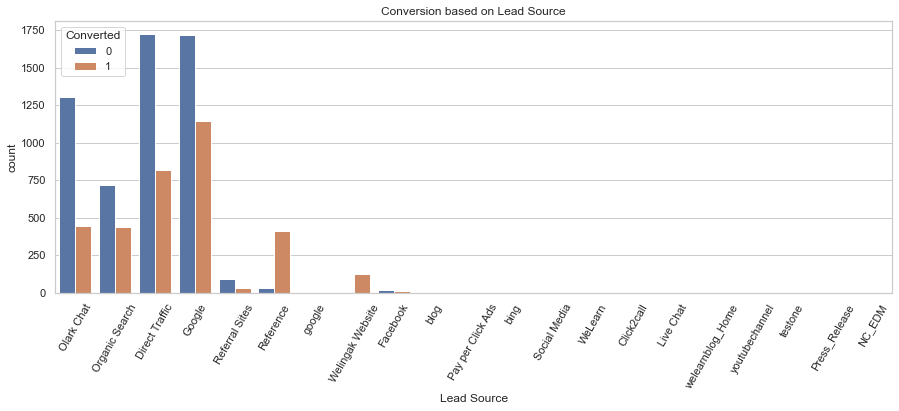

In [46]:
# Lead Source
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.title("Conversion based on Lead Source")
plt.xticks(rotation=60)
plt.show()

In [47]:
# Lead sources that have generated very few leads can be clubbed as others so as to get a better understanding of the datapoints
# Also, there are two sources - google & Google. They refer to the same platform and hence we will be merging them. 

df['Lead Source'] = df['Lead Source'].replace('google', 'Google')
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads',
                                               'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 
                                               'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

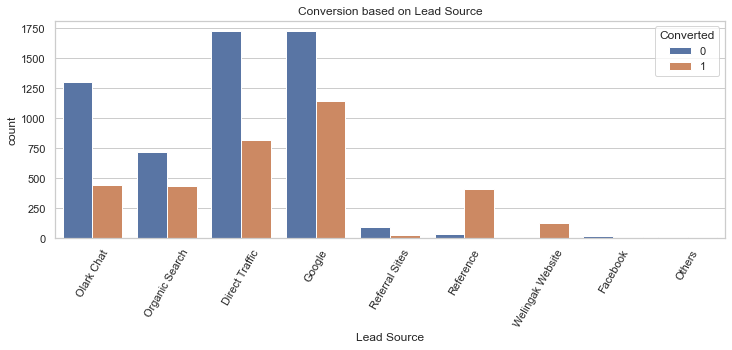

In [48]:
plt.figure(figsize=(12,4))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.title("Conversion based on Lead Source")
plt.xticks(rotation=60)
plt.show()

In [49]:
conversion(df,'Lead Source')

Converted            0     1  Conversion_Rate(in %)
Lead Source                                        
Welingak Website     2   127                   98.0
Reference           33   410                   93.0
Google            1726  1147                   40.0
Others              14     9                   39.0
Organic Search     718   436                   38.0
Direct Traffic    1725   818                   32.0
Facebook            22     9                   29.0
Olark Chat        1305   448                   26.0
Referral Sites      94    31                   25.0


### Summary: 
- We can see that `Welingak Website` and `Reference` are the Sources which have the best conversion rates however, they generate verey few leads. Hence the company should focus on generating more leads from these two sources. 
- We can also see that `Google` and `Direct Traffic` Sources generate the most leads out of all sources but their conversion rates are around 40% and 32% respectively. The company should be focusing on improving the lead conversion rate of these two sources. 
- Sources such as `Olark Chat` & `Organic Search` generate quite a few number of leads but the conversion rate from these two sources is still low i.e., 26% and 38% respectively. The company should focus on improving the conversation rate of these 2 sources as well and see if they can generate more leads from the `Organic search` source. 

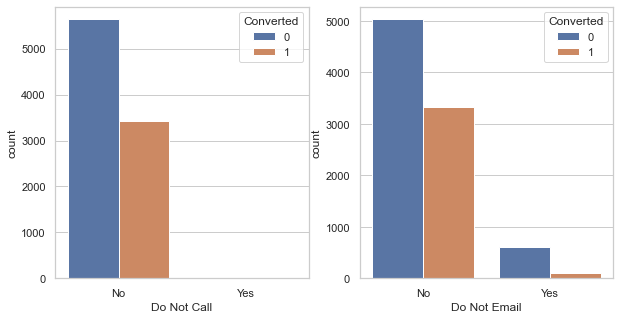

In [50]:
# Do not Call & Do not Email Columns
fig, axs = plt.subplots(1,2, figsize = (10,5))
sns.countplot(x='Do Not Call', hue = 'Converted', data = df, ax = axs[0])
sns.countplot(x='Do Not Email', hue = 'Converted', data = df, ax = axs[1])
plt.show()

In [51]:
conversion(df, 'Do Not Call')

Converted         0       1  Conversion_Rate(in %)
Do Not Call                                       
Yes             0.0     2.0                  100.0
No           5639.0  3433.0                   38.0


In [52]:
conversion(df, 'Do Not Email')

Converted        0     1  Conversion_Rate(in %)
Do Not Email                                   
No            5027  3331                   40.0
Yes            612   104                   15.0


### Summary: 
- We can see that maximum people do not like to be called or emailed and those who do like to be called are more or less interested in the product and hence the conversation rate can be seen as 100%. 
- However, still the conversion rate by email is still greater than conversion rate by call hence it might not be a bad idea to do a segmented email marketing campaign to increase the conversion rate. 

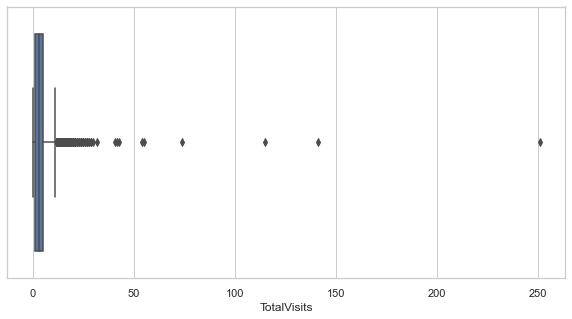

In [53]:
# Total Visits 
plt.figure(figsize=(10,5))
sns.boxplot(x = 'TotalVisits', hue = 'Converted', data = df) 
plt.show()

In [54]:
# Capping the values of TotalVisits between the 5th and the 95th percentile as to reduce the number of outliers. 
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

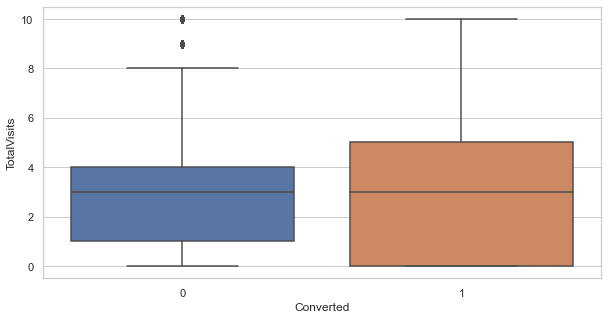

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(y= 'TotalVisits', x = 'Converted', data = df) 
plt.show()

### Summary: 
- We can see that the medians of the users who converted and those who not converted after visiting their platform is similar hence we can say that there is an equal chance of a user getting coverted (applying for the course) and not getting converted (not applying for the course) after visiting the company's platform. 

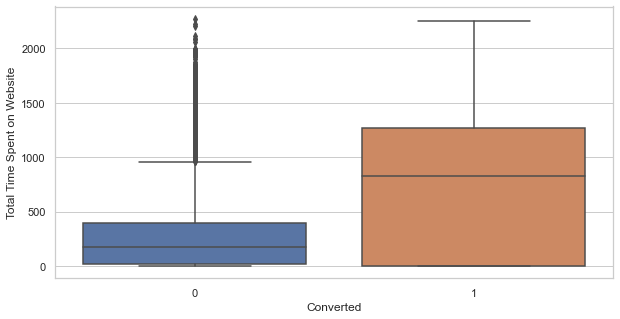

In [56]:
# Total Time Spent on the website
plt.figure(figsize=(10,5))
sns.boxplot(y= 'Total Time Spent on Website', x = 'Converted', data = df) 
plt.show()

### Summary: 
- We can see that people spending more time on the website are more likely to convert on average. 
- There are some outliers who have spent a lot of time on the website but still haven't converted. It could be infered from this that they were either idle after visiting their website or even after reading the course details they were not interested or did not like what they saw and did not convert. 

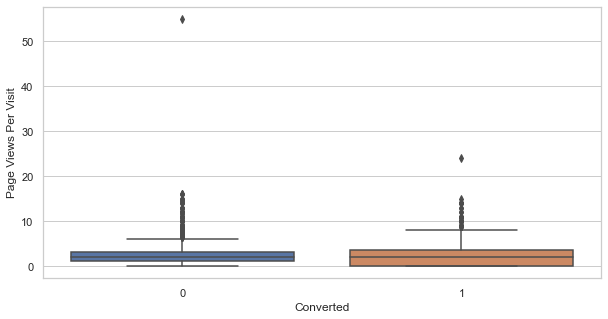

In [57]:
# Page Views Per Visit
plt.figure(figsize=(10,5))
sns.boxplot(y= 'Page Views Per Visit', x = 'Converted', data = df) 
plt.show()

In [58]:
# We will be performing the same steps to cap the outliers between 5 and 95 percentiles 
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

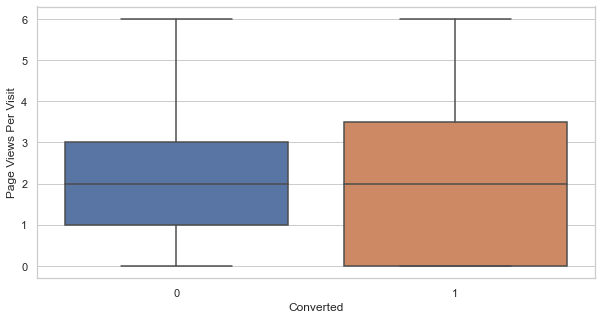

In [59]:
plt.figure(figsize=(10,5))
sns.boxplot(y= 'Page Views Per Visit', x = 'Converted', data = df) 
plt.show()

### Summary:
- People who view 1-3 pages per visit to the platform have a 50-50 chance of converting and we can see that by observing the equal medians for both. 
- However, people who have viewed 0-1 pages per visit to the platform have a higher chance of conversion.

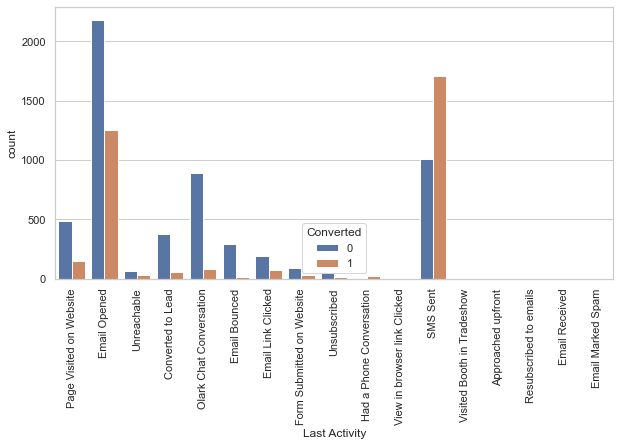

In [60]:
# Last Activity
plt.figure(figsize=(10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [61]:
conversion(df, 'Last Activity')

Converted                          0       1  Conversion_Rate(in %)
Last Activity                                                      
Approached upfront               0.0     5.0                  100.0
Email Marked Spam                0.0     2.0                  100.0
Resubscribed to emails           0.0     1.0                  100.0
Email Received                   0.0     2.0                  100.0
Had a Phone Conversation         5.0    20.0                   80.0
SMS Sent                      1011.0  1705.0                   63.0
Email Opened                  2182.0  1250.0                   36.0
Unreachable                     61.0    29.0                   32.0
Email Link Clicked             194.0    73.0                   27.0
Form Submitted on Website       88.0    28.0                   24.0
Page Visited on Website        489.0   151.0                   24.0
Unsubscribed                    45.0    14.0                   24.0
View in browser link Clicked     5.0     1.0    

### Summary: 
- We can see that maximum leads are generated via `SMS Sent` and `Email Opened` categories and the conversion rates are 63% and 36% respectively. 
- We can also see that `Olark Chat Conversation` & `Page Visited on Website` also generate quite a few leads but the conversion rate for these two categories is still too low. 
- People with whom the company has `Had a Phone Conversation`, the conversion rate for those is 80%.
- If the company wants to improve their overall conversion rate, they can focus on improving the conversion rated for `Olark` and `Page visited` categories and have more `Phone Conversations` with the leads. There is a high chance that people who are okay with receiving a call and are willing to listen will get converted and apply for the course. 

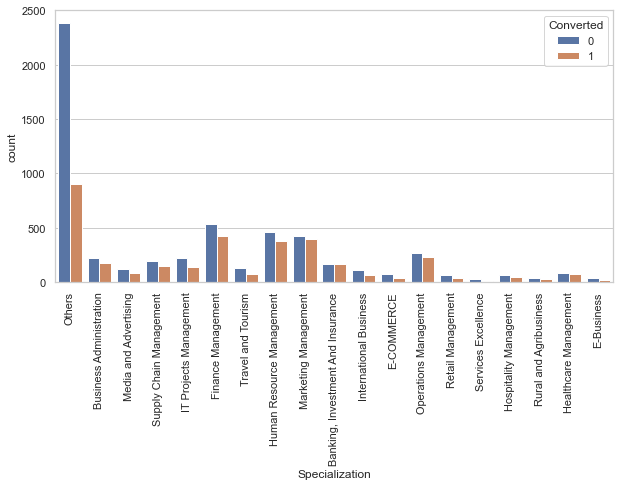

In [62]:
# Specialization
plt.figure(figsize=(10,5))
sns.countplot(x = "Specialization", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [63]:
conversion(df, "Specialization")

Converted                             0    1  Conversion_Rate(in %)
Specialization                                                     
Banking, Investment And Insurance   171  164                   49.0
Healthcare Management                80   76                   49.0
Marketing Management                426  397                   48.0
Operations Management               265  234                   47.0
Human Resource Management           457  380                   45.0
Finance Management                  537  422                   44.0
Business Administration             224  175                   44.0
Supply Chain Management             198  148                   43.0
Rural and Agribusiness               42   31                   42.0
Media and Advertising               118   84                   42.0
Hospitality Management               66   45                   41.0
IT Projects Management              226  140                   38.0
E-Business                           36   21    

### Summary: 
- We can see that almost all of the specializations that are recognized by the company have a conversion rate between 30% - 50%. 
- We can also see that the `Others` section which dealt with with information about the users who either don't have a specialization or didn't find it in the specializations recognized by our company brings in the most leads with a conversion rate of around ***27%***. 


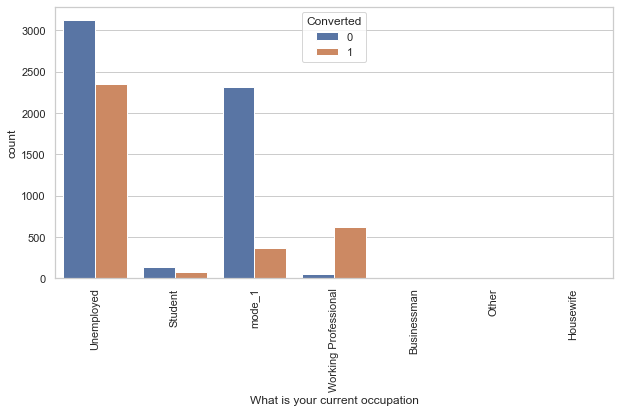

In [64]:
# Occupation
plt.figure(figsize=(10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()


In [65]:
conversion(df, "What is your current occupation")

Converted                             0       1  Conversion_Rate(in %)
What is your current occupation                                       
Housewife                           0.0     9.0                  100.0
Working Professional               55.0   622.0                   92.0
Businessman                         3.0     5.0                   62.0
Other                               6.0     9.0                   60.0
Unemployed                       3130.0  2346.0                   43.0
Student                           132.0    74.0                   36.0
mode_1                           2313.0   370.0                   14.0


### Summary: 
- `Working Professional` and `Unemployed` categories seems to bring in a lot of leads with a conversion rate of 92% and 43% respectively. 
- The company should be focusing on generating more leads from `Working Professionals` and try to increase the conversion rate of `Unemployed` category users. 

In [66]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

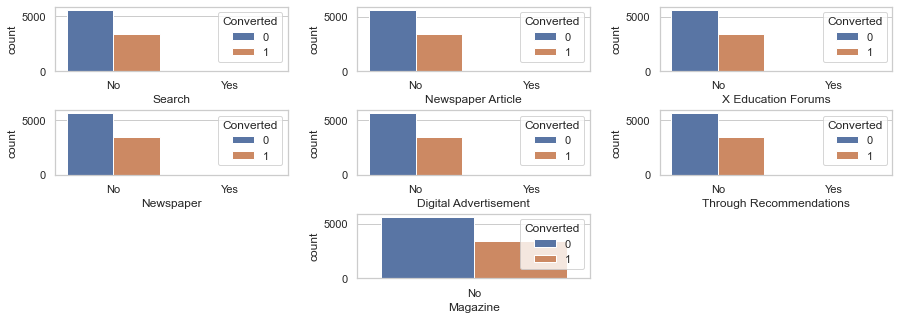

In [67]:
# Search, Newspaper Article, Newspaper, X Education Forums, Digital Advertisement, Through Recommendations
plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=0.6, wspace=0.3)
plt.subplot(3,3,1)
sns.countplot(x = "Search", hue = "Converted", data = df)

plt.subplot(3,3,2)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df)

plt.subplot(3,3,3)
sns.countplot(x = "X Education Forums", hue = "Converted", data = df)

plt.subplot(3,3,4)
sns.countplot(x = "Newspaper", hue = "Converted", data = df)

plt.subplot(3,3,5)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df)

plt.subplot(3,3,6)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df)

plt.subplot(3,3,8)
sns.countplot(x = "Magazine", hue="Converted", data = df)

plt.show()

### Summary: 
- We can see that features such as `search`, `Newspaper`, `Newspaper Article`, `X Education Forums`, `Digital Advertisement`, `Through Recommendations` have not played in important role in lead generation. Almost 99% of users and 100% of `Magazine` users did not come through these platforms for the course. 
- All of the leads have a similar conversion ratio and does not seem to be dependent on these sources. 

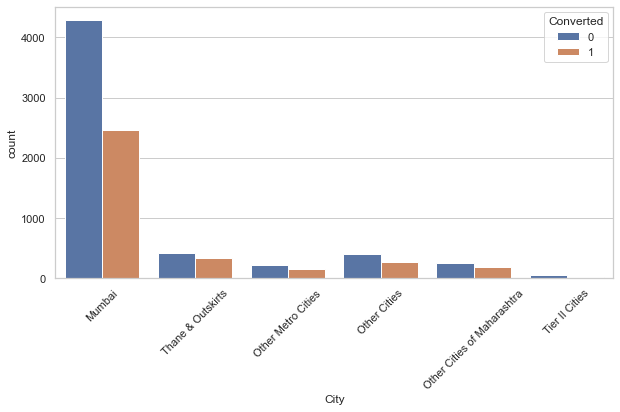

In [68]:
# City
plt.figure(figsize=(10,5))
sns.countplot(x = "City", hue = "Converted", data = df)
plt.xticks(rotation=45)
plt.show()

In [69]:
conversion(df, "City")

Converted                       0     1  Conversion_Rate(in %)
City                                                          
Thane & Outskirts             413   332                   45.0
Other Cities of Maharashtra   250   196                   44.0
Other Metro Cities            223   154                   41.0
Other Cities                  408   272                   40.0
Mumbai                       4296  2456                   36.0
Tier II Cities                 49    25                   34.0


### Summary:
- We can see that the city `Mumbai` brings in the most leads but does not have a significant conversion rate. 
- Cities like `Thane` and other outskirts cities of Maharashtra also generate some leads and have 40 - 50 % conversion rate as well. 
- The company should focus on increasing the conversion rate of `Mumbai` and also focus on generating more leads from other cities. 

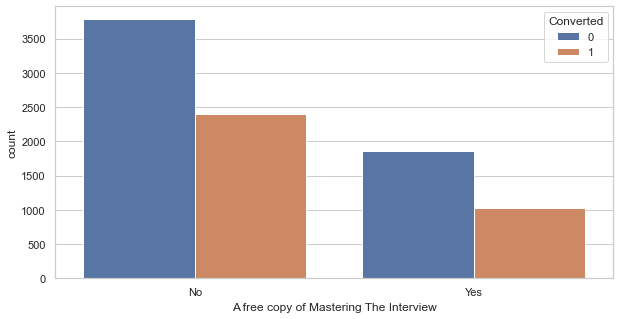

In [70]:
# A free copy of Mastering The Interview

plt.figure(figsize=(10,5))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df)
plt.show()

In [71]:
conversion(df, "A free copy of Mastering The Interview") 

Converted                                  0     1  Conversion_Rate(in %)
A free copy of Mastering The Interview                                   
No                                      3781  2405                   39.0
Yes                                     1858  1030                   36.0


### Summary: 
- We can see that a lot of customers did not want a `A free copy of Mastering The Interview` however, that did not seem to have a significant impact on the conversion rate of the leads. 
- We can say that it is not a significant feature in deciding the conversion rate. 

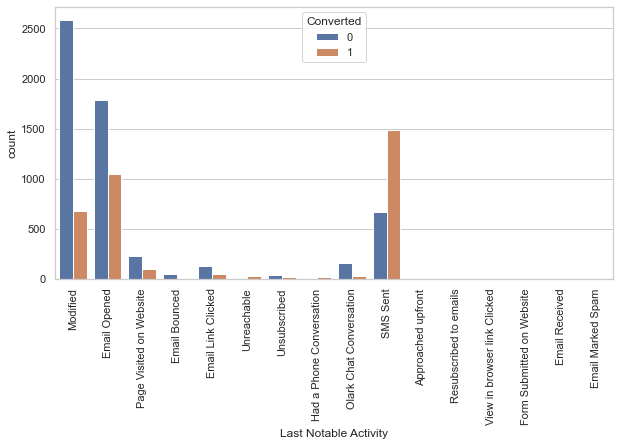

In [72]:
# Last Notable Activity
plt.figure(figsize=(10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

### Summary: 
- We can see that this column and `Last Activity` column are similar and give similar results. 

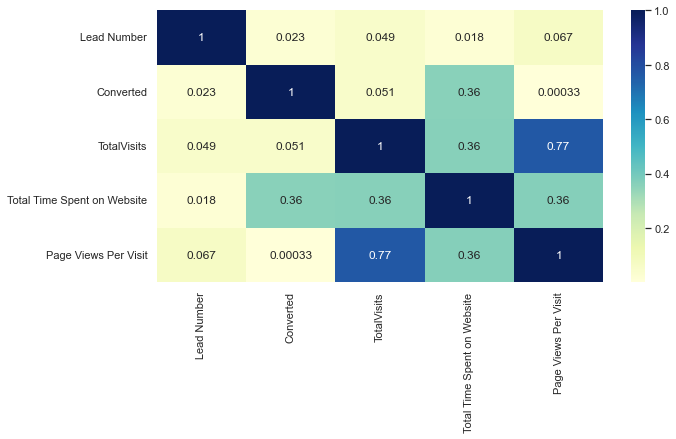

In [73]:
#Now let us check the correlation among variables

plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

### Summary: 
- We can that the columns - `TotalVisits` and `Page Views Per Visit` are highly correlated. We will need to treat this collinearity between multiple variables. 

In [74]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,No,No,No,No,No,No,Mumbai,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,No,No,No,No,No,No,Mumbai,No,Modified


***We can see that there are quite a few columns that are not significant to our analysis at the first glance, hence we will be dropping those columns now***

In [75]:
# Dropping irrelevant columns from the dataset - 

df = df.drop(['Lead Number','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations'],axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,No,Modified


In [76]:
df.shape

(9074, 14)

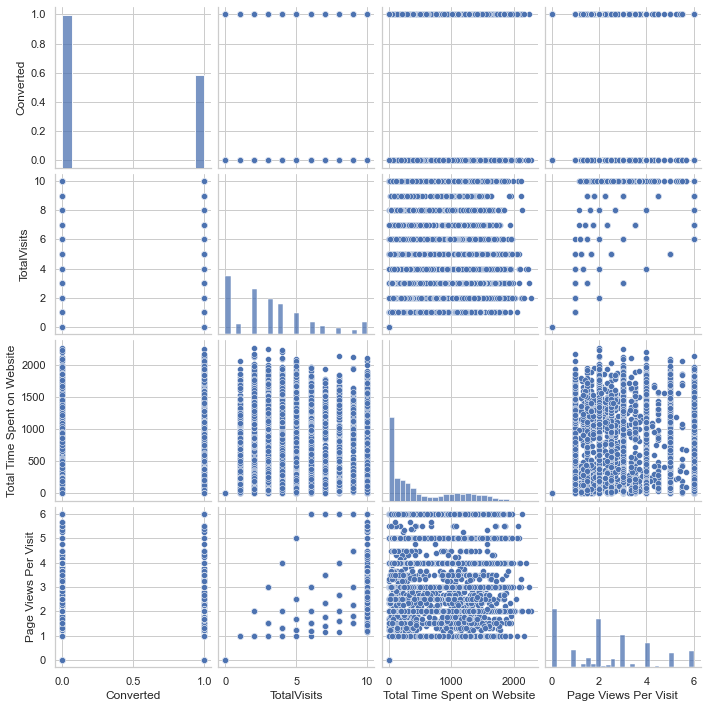

In [77]:
sns.pairplot(df)

## Step 3: Data Preparation for Model Building
</hr>
We will be building a Logistic Regression Model for this problem

### Converting Binary Variables (Yes/No) to (1/0)

In [78]:
# List of binary variables
l =  ['A free copy of Mastering The Interview','Do Not Email','Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({"Yes": 1, "No": 0})

# Applying the map function to the variables list
df[l] = df[l].apply(binary_map)

In [79]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,0,Modified


### Creating Dummy Variables for Categorical Variables:

In [80]:
# We will be using the get_dummies function of the pandas library to create dummy variables. 
dummy_list = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity']
dummies = pd.get_dummies(df[dummy_list],drop_first=True) # we use drop_first method as we need n-1 dummies for n variables
dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_mode_1,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [81]:
# Combining the original and the dummies dataset
df = pd.concat([df, dummies], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_mode_1,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,0,Modified,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [82]:
# As we now have the dummy variables, it's time to drop the original columns
cols_to_drop = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
             'City','Last Notable Activity','Lead Source_Others','Specialization_Others']
df = df.drop(cols_to_drop, axis=1)
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_mode_1,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [83]:
df.shape

(9074, 76)

## Step 4.1: Model Preprocessing - Train Test Split
</hr>

In [84]:
# Putting the dependent Variable in y
y = df.pop('Converted')

# Putting the Independent variables in X 
X = df

In [85]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [86]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_mode_1,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [87]:
# Splitting the Dataset into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

## Step 4.2: Model Preprocessing - Feature Scaling 
</hr>

In [88]:
# Creating a Standard Scaler Object 
scaler = StandardScaler()

# Applying Scaler() Object to numerical variables 
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_mode_1,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1943,0,0,-0.432839,1.704380,-0.147676,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456,0,0,-0.432839,-0.789845,-0.147676,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6547,0,0,0.644762,-0.176811,1.544362,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8836,0,0,0.285562,2.117949,0.980349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6529,0,0,0.644762,0.315446,1.544362,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Step 5: Model Building & Feature Selection
</hr>

#### Step 5.1: Running Initial GLM Regression Model with all the features using Statsmodel

In [89]:
# GLM Regression Model ( Generalized Linear Model )
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6281
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2463.6
Date:                Sat, 21 Jan 2023   Deviance:                       4927.1
Time:                        15:53:43   Pearson chi2:                 6.43e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4208
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   22.4465   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -1.2497      0.218     -5.745      0.000      -1.676      -0.823
Do Not Call                                             21.1328   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
TotalVisits                                              0.3521      0.058      6.102      0.000       0.239       0.465
Total Time Spent on Website                              1.1045      0.042     26.327      0.000       1.022       1.187
Page Views Per Visit                                    -0.2866      0.064     -4.474      0.000      -0.412      -0.161
A free copy of Mastering The Interview                  -0.1640      0.111     -1.472      0.141      -0.382       0.054
Lead Origin_Landing Page Submission                     -0.6168      0.132     -4.681      0.000      -0.875      -0.359
Lead Origin_Lead Add Form                                0.7423      1.005      0.739      0.460      -1.228       2.712
Lead Origin_Lead Import                                  0.4130      0.256      1.613      0.107      -0.089       0.915
Lead Source_Facebook                                     0.4130      0.256      1.613      0.107      -0.089       0.915
Lead Source_Google                                       0.2278      0.117      1.952      0.051      -0.001       0.457
Lead Source_Olark Chat                                   1.2975      0.170      7.616      0.000       0.964       1.631
Lead Source_Organic Search                               0.0817      0.136      0.603      0.547      -0.184       0.348
Lead Source_Reference                                    2.4770      1.023      2.421      0.015       0.472       4.482
Lead Source_Referral Sites                              -0.1516      0.347     -0.437      0.662      -0.831       0.528
Lead Source_Welingak Website                             5.4644      1.425      3.836      0.000       2.672       8.256
Last Activity_Converted to Lead                        -25.6036   5.62e+04     -0.000      1.000    -1.1e+05     1.1e+05
Last Activity_Email Bounced                            -26.2894   5.62e+04     -0.000      1.000    -1.1e+05     1.1e+05
Last Activity_Email Link Clicked                       -24.6684   5.62e+04     -0.000      1.000    -1.1e+05     1.1e+05
Last Activity_Email Marked Spam                          0.0693   5.62e+04   1.23e-06      1.000    -1.1e+05     1.1e+05
Last Activity_Email Opened                             -24.5161   5.62e+04     -0.000      1.000    -1.1e+05     1.1e+05
Last Activity_Email Received                            -0

#### Step 5.2: Feature Selection using Recursive Feature Elimination (RFE)

In [90]:
#Creating a Logistic Regression Object 
logreg = LogisticRegression()

In [91]:
#Running RFE with 20 variables as output 
rfe = RFE(logreg, n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [92]:
rfe.support_

array([ True, False, False,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False])

In [93]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 43),
 ('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('A free copy of Mastering The Interview', False, 38),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 44),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 40),
 ('Last Activity_Email Marked Spam', False, 36),
 ('Last Activity_Email Opened', False, 6),
 ('Last Activity_Email Received', False, 49),
 ('Last Activity_Form Submitted on Website', False, 13),
 ('Last Activity_Had a Phone

In [94]:
col = X_train.columns[rfe.support_]

In [95]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Speciali

#### Step 5.3: Model Building

In [96]:
# Model no.1 after RFE
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2542.9
Date:                Sat, 21 Jan 2023   Deviance:                       5085.8
Time:                        15:53:46   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0691      0.530     -0.130      0.896      -1.108       0.970
Do Not Email                                            -1.2672      0.195     -6.505      0.000      -1.649      -0.885
Total Time Spent on Website                              1.1313      0.041     27.507      0.000       1.051       1.212
Lead Origin_Lead Add Form                                1.0244      1.071      0.957      0.339      -1.074       3.123
Lead Origin_Lead Import                                  1.0335      0.487      2.124      0.034       0.080       1.987
Lead Source_Olark Chat                                   1.3582      0.108     12.625      0.000       1.147       1.569
Lead Source_Reference                                    2.4827      1.091      2.276      0.023       0.345       4.621
Lead Source_Welingak Website                             5.1906      1.475      3.519      0.000       2.299       8.082
Last Activity_Converted to Lead                         -0.7643      0.231     -3.310      0.001      -1.217      -0.312
Last Activity_Email Bounced                             -0.9574      0.419     -2.283      0.022      -1.780      -0.135
Last Activity_Had a Phone Conversation                   1.0155      0.903      1.124      0.261      -0.755       2.786
Last Activity_Olark Chat Conversation                   -0.8184      0.163     -5.007      0.000      -1.139      -0.498
Last Activity_SMS Sent                                   1.2107      0.077     15.659      0.000       1.059       1.362
What is your current occupation_Housewife               22.1402    1.6e+04      0.001      0.999   -3.13e+04    3.13e+04
What is your current occupation_Student                 -0.7832      0.570     -1.375      0.169      -1.900       0.334
What is your current occupation_Unemployed              -0.9221      0.530     -1.739      0.082      -1.961       0.117
What is your current occupation_Working Professional     1.6586      0.563      2.946      0.003       0.555       2.762
What is your current occupation_mode_1                  -2.1630      0.534     -4.048      0.000      -3.210      -1.116
Last Notable Activity_Had a Phone Conversation           2.1196      1.474      1.438      0.150      -0.770       5.009
Last Notable Activity_Modified                          -0.5953      0.087     -6.834      0.000      -0.766      -0.425
Last Notable Activity_Unreachable                        2.0413      0.564      3.622      0.000       0.937       3.146
========================================================================================================================
"""

In [97]:
# Defining a function for Variance Inflation Factor (VIF) 
def VIF(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [98]:
#checking VIF for the 1st Model
VIF(col)

,Features,VIF
2,Lead Origin_Lead Add Form,81.19
5,Lead Source_Reference,63.10
6,Lead Source_Welingak Website,19.27
9,Last Activity_Had a Phone Conversation,2.45
17,Last Notable Activity_Had a Phone Conversation,2.44
18,Last Notable Activity_Modified,2.13
14,What is your current occupation_Unemployed,2.05
0,Do Not Email,1.85
8,Last Activity_Email Bounced,1.83
4,Lead Source_Olark Chat,1.79


***We can see that the feature - `What is your current occupation_Housewife` have a very high $p-value$ (0.999), hence we will be dropping that column***

In [99]:
# Dropping the What is your current occupation_Housewife column
col1 = col.drop("What is your current occupation_Housewife", 1) 
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_mode_1',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [100]:
# MODEL no.2
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2545.9
Date:                Sat, 21 Jan 2023   Deviance:                       5091.7
Time:                        15:53:46   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4056
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4617      0.480      0.961      0.336      -0.480       1.403
Do Not Email                                            -1.2714      0.195     -6.520      0.000      -1.654      -0.889
Total Time Spent on Website                              1.1298      0.041     27.492      0.000       1.049       1.210
Lead Origin_Lead Add Form                                1.0237      1.070      0.956      0.339      -1.074       3.121
Lead Origin_Lead Import                                  1.0311      0.487      2.119      0.034       0.077       1.985
Lead Source_Olark Chat                                   1.3552      0.108     12.602      0.000       1.144       1.566
Lead Source_Reference                                    2.4845      1.090      2.278      0.023       0.347       4.622
Lead Source_Welingak Website                             5.1895      1.475      3.518      0.000       2.299       8.080
Last Activity_Converted to Lead                         -0.7649      0.231     -3.313      0.001      -1.217      -0.312
Last Activity_Email Bounced                             -0.9538      0.419     -2.274      0.023      -1.776      -0.132
Last Activity_Had a Phone Conversation                   1.0149      0.903      1.124      0.261      -0.755       2.785
Last Activity_Olark Chat Conversation                   -0.8234      0.164     -5.035      0.000      -1.144      -0.503
Last Activity_SMS Sent                                   1.2099      0.077     15.650      0.000       1.058       1.361
What is your current occupation_Student                 -1.3122      0.524     -2.503      0.012      -2.340      -0.285
What is your current occupation_Unemployed              -1.4515      0.481     -3.018      0.003      -2.394      -0.509
What is your current occupation_Working Professional     1.1287      0.517      2.184      0.029       0.116       2.142
What is your current occupation_mode_1                  -2.6917      0.486     -5.542      0.000      -3.644      -1.740
Last Notable Activity_Had a Phone Conversation           2.1183      1.474      1.437      0.151      -0.771       5.007
Last Notable Activity_Modified                          -0.5952      0.087     -6.838      0.000      -0.766      -0.425
Last Notable Activity_Unreachable                        2.0397      0.564      3.619      0.000       0.935       3.144
========================================================================================================================
"""

In [101]:
#Checking VIF for the model features
VIF(col1)

,Features,VIF
2,Lead Origin_Lead Add Form,81.19
5,Lead Source_Reference,63.10
6,Lead Source_Welingak Website,19.27
9,Last Activity_Had a Phone Conversation,2.45
16,Last Notable Activity_Had a Phone Conversation,2.44
17,Last Notable Activity_Modified,2.12
13,What is your current occupation_Unemployed,2.04
0,Do Not Email,1.85
8,Last Activity_Email Bounced,1.83
4,Lead Source_Olark Chat,1.79


***We can see that feature `Lead Source_Reference` has a high VIF hence we will be removing this column***

In [102]:
# Dropping the Lead Source_Reference Column
col2 = col1.drop("Lead Source_Reference",1)
col2

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_mode_1',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [103]:
# MODEL no.3
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2548.0
Date:                Sat, 21 Jan 2023   Deviance:                       5096.1
Time:                        15:53:47   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4052
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4658      0.480      0.971      0.332      -0.474       1.406
Do Not Email                                            -1.2675      0.195     -6.511      0.000      -1.649      -0.886
Total Time Spent on Website                              1.1282      0.041     27.457      0.000       1.048       1.209
Lead Origin_Lead Add Form                                3.4404      0.213     16.118      0.000       3.022       3.859
Lead Origin_Lead Import                                  1.0290      0.487      2.115      0.034       0.075       1.983
Lead Source_Olark Chat                                   1.3498      0.108     12.544      0.000       1.139       1.561
Lead Source_Welingak Website                             2.7702      1.035      2.677      0.007       0.742       4.798
Last Activity_Converted to Lead                         -0.7642      0.231     -3.311      0.001      -1.217      -0.312
Last Activity_Email Bounced                             -0.9566      0.419     -2.281      0.023      -1.779      -0.135
Last Activity_Had a Phone Conversation                   1.0159      0.903      1.125      0.261      -0.754       2.785
Last Activity_Olark Chat Conversation                   -0.8210      0.164     -5.021      0.000      -1.141      -0.501
Last Activity_SMS Sent                                   1.2102      0.077     15.664      0.000       1.059       1.362
What is your current occupation_Student                 -1.3116      0.524     -2.504      0.012      -2.338      -0.285
What is your current occupation_Unemployed              -1.4549      0.480     -3.028      0.002      -2.396      -0.513
What is your current occupation_Working Professional     1.1279      0.516      2.185      0.029       0.116       2.140
What is your current occupation_mode_1                  -2.6940      0.485     -5.553      0.000      -3.645      -1.743
Last Notable Activity_Had a Phone Conversation           2.1157      1.474      1.436      0.151      -0.773       5.004
Last Notable Activity_Modified                          -0.5963      0.087     -6.855      0.000      -0.767      -0.426
Last Notable Activity_Unreachable                        2.0391      0.563      3.620      0.000       0.935       3.143
========================================================================================================================
"""

In [104]:
# Checking the VIF for the model features
VIF(col2)

,Features,VIF
8,Last Activity_Had a Phone Conversation,2.45
15,Last Notable Activity_Had a Phone Conversation,2.44
16,Last Notable Activity_Modified,2.12
12,What is your current occupation_Unemployed,2.04
0,Do Not Email,1.85
7,Last Activity_Email Bounced,1.83
4,Lead Source_Olark Chat,1.79
10,Last Activity_SMS Sent,1.67
14,What is your current occupation_mode_1,1.66
9,Last Activity_Olark Chat Conversation,1.62


***As we can see that column `Last Activity_Had a Phone Conversation` has a high $p-value$ (0.261) and a VIF value of (2.45)***

In [105]:
col3 = col2.drop("Last Activity_Had a Phone Conversation",1)
col3

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_mode_1',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [106]:
# MODEL no.4
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2548.7
Date:                Sat, 21 Jan 2023   Deviance:                       5097.3
Time:                        15:53:47   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4051
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4629      0.480      0.965      0.335      -0.477       1.403
Do Not Email                                            -1.2686      0.195     -6.517      0.000      -1.650      -0.887
Total Time Spent on Website                              1.1288      0.041     27.476      0.000       1.048       1.209
Lead Origin_Lead Add Form                                3.4384      0.213     16.112      0.000       3.020       3.857
Lead Origin_Lead Import                                  1.0262      0.487      2.109      0.035       0.073       1.980
Lead Source_Olark Chat                                   1.3489      0.108     12.540      0.000       1.138       1.560
Lead Source_Welingak Website                             2.7713      1.035      2.678      0.007       0.743       4.800
Last Activity_Converted to Lead                         -0.7727      0.231     -3.350      0.001      -1.225      -0.321
Last Activity_Email Bounced                             -0.9609      0.419     -2.292      0.022      -1.783      -0.139
Last Activity_Olark Chat Conversation                   -0.8265      0.163     -5.057      0.000      -1.147      -0.506
Last Activity_SMS Sent                                   1.2077      0.077     15.641      0.000       1.056       1.359
What is your current occupation_Student                 -1.3088      0.524     -2.499      0.012      -2.335      -0.282
What is your current occupation_Unemployed              -1.4503      0.480     -3.019      0.003      -2.392      -0.509
What is your current occupation_Working Professional     1.1320      0.516      2.193      0.028       0.120       2.144
What is your current occupation_mode_1                  -2.6903      0.485     -5.545      0.000      -3.641      -1.739
Last Notable Activity_Had a Phone Conversation           3.1304      1.166      2.685      0.007       0.845       5.415
Last Notable Activity_Modified                          -0.5894      0.087     -6.797      0.000      -0.759      -0.419
Last Notable Activity_Unreachable                        2.0383      0.563      3.618      0.000       0.934       3.142
========================================================================================================================
"""

In [107]:
VIF(col3)

,Features,VIF
15,Last Notable Activity_Modified,2.12
11,What is your current occupation_Unemployed,2.04
0,Do Not Email,1.85
7,Last Activity_Email Bounced,1.83
4,Lead Source_Olark Chat,1.79
9,Last Activity_SMS Sent,1.67
13,What is your current occupation_mode_1,1.66
8,Last Activity_Olark Chat Conversation,1.62
2,Lead Origin_Lead Add Form,1.58
1,Total Time Spent on Website,1.32


***We saw that `What is your current occupation_Unemployed` column has a high VIF. Let's drop that column***

In [108]:
# Dropping column What is your current occupation_Unemployed 
col4= col3.drop("What is your current occupation_Unemployed",1)
col4

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'What is your current occupation_mode_1',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [109]:
# MODEL no.5
X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2553.5
Date:                Sat, 21 Jan 2023   Deviance:                       5107.1
Time:                        15:53:47   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4041
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9736      0.061    -16.046      0.000      -1.093      -0.855
Do Not Email                                            -1.2624      0.194     -6.506      0.000      -1.643      -0.882
Total Time Spent on Website                              1.1308      0.041     27.544      0.000       1.050       1.211
Lead Origin_Lead Add Form                                3.4491      0.213     16.174      0.000       3.031       3.867
Lead Origin_Lead Import                                  1.0142      0.486      2.085      0.037       0.061       1.967
Lead Source_Olark Chat                                   1.3459      0.107     12.526      0.000       1.135       1.557
Lead Source_Welingak Website                             2.7516      1.035      2.659      0.008       0.723       4.780
Last Activity_Converted to Lead                         -0.7977      0.231     -3.460      0.001      -1.249      -0.346
Last Activity_Email Bounced                             -0.9841      0.419     -2.350      0.019      -1.805      -0.163
Last Activity_Olark Chat Conversation                   -0.8309      0.163     -5.092      0.000      -1.151      -0.511
Last Activity_SMS Sent                                   1.1945      0.077     15.505      0.000       1.044       1.346
What is your current occupation_Student                  0.1276      0.218      0.586      0.558      -0.300       0.555
What is your current occupation_Working Professional     2.5695      0.199     12.928      0.000       2.180       2.959
What is your current occupation_mode_1                  -1.2521      0.090    -13.949      0.000      -1.428      -1.076
Last Notable Activity_Had a Phone Conversation           3.1211      1.167      2.675      0.007       0.834       5.408
Last Notable Activity_Modified                          -0.5764      0.086     -6.670      0.000      -0.746      -0.407
Last Notable Activity_Unreachable                        2.0310      0.564      3.602      0.000       0.926       3.136
========================================================================================================================
"""

In [110]:
VIF(col4)

,Features,VIF
14,Last Notable Activity_Modified,1.88
0,Do Not Email,1.83
7,Last Activity_Email Bounced,1.83
4,Lead Source_Olark Chat,1.66
8,Last Activity_Olark Chat Conversation,1.61
2,Lead Origin_Lead Add Form,1.53
12,What is your current occupation_mode_1,1.40
5,Lead Source_Welingak Website,1.32
9,Last Activity_SMS Sent,1.30
1,Total Time Spent on Website,1.28


***Now we can see that `What is your current occupation_Student` has a high $p-value$ (0.558), hence we will be dropping that column***

In [111]:
#Dropping the column What is your current occupation_Student
col5 = col4.drop("What is your current occupation_Student",1)
col5

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'What is your current occupation_mode_1',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [112]:
# MODEL no.6
X_train_sm = sm.add_constant(X_train[col5])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2553.7
Date:                Sat, 21 Jan 2023   Deviance:                       5107.4
Time:                        15:53:47   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4041
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9689      0.060    -16.115      0.000      -1.087      -0.851
Do Not Email                                            -1.2637      0.194     -6.511      0.000      -1.644      -0.883
Total Time Spent on Website                              1.1311      0.041     27.551      0.000       1.051       1.212
Lead Origin_Lead Add Form                                3.4515      0.213     16.189      0.000       3.034       3.869
Lead Origin_Lead Import                                  1.0108      0.486      2.079      0.038       0.058       1.964
Lead Source_Olark Chat                                   1.3483      0.107     12.556      0.000       1.138       1.559
Lead Source_Welingak Website                             2.7454      1.035      2.653      0.008       0.717       4.774
Last Activity_Converted to Lead                         -0.7969      0.231     -3.456      0.001      -1.249      -0.345
Last Activity_Email Bounced                             -0.9766      0.419     -2.333      0.020      -1.797      -0.156
Last Activity_Olark Chat Conversation                   -0.8271      0.163     -5.075      0.000      -1.147      -0.508
Last Activity_SMS Sent                                   1.1920      0.077     15.499      0.000       1.041       1.343
What is your current occupation_Working Professional     2.5649      0.199     12.917      0.000       2.176       2.954
What is your current occupation_mode_1                  -1.2569      0.089    -14.065      0.000      -1.432      -1.082
Last Notable Activity_Had a Phone Conversation           3.1181      1.167      2.672      0.008       0.831       5.405
Last Notable Activity_Modified                          -0.5766      0.086     -6.672      0.000      -0.746      -0.407
Last Notable Activity_Unreachable                        2.0284      0.564      3.596      0.000       0.923       3.134
========================================================================================================================
"""

In [113]:
# Checking the VIF for model features
VIF(col5)

,Features,VIF
13,Last Notable Activity_Modified,1.88
0,Do Not Email,1.83
7,Last Activity_Email Bounced,1.82
4,Lead Source_Olark Chat,1.65
8,Last Activity_Olark Chat Conversation,1.61
2,Lead Origin_Lead Add Form,1.53
11,What is your current occupation_mode_1,1.39
5,Lead Source_Welingak Website,1.31
9,Last Activity_SMS Sent,1.30
1,Total Time Spent on Website,1.27


***We can see that the $p-value$ of `Lead Origin_Lead Import` is also on a little high end, hence we will be dropping the column***

In [114]:
# Dropping the Lead Origin_lead Import column
col6 = col5.drop("Lead Origin_Lead Import",1)
col6


Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'What is your current occupation_mode_1',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [115]:
# Model no.7
X_train_sm = sm.add_constant(X_train[col6])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.6
Date:                Sat, 21 Jan 2023   Deviance:                       5111.2
Time:                        15:53:47   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4038
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9592      0.060    -16.028      0.000      -1.077      -0.842
Do Not Email                                            -1.2675      0.194     -6.539      0.000      -1.647      -0.888
Total Time Spent on Website                              1.1236      0.041     27.536      0.000       1.044       1.204
Lead Origin_Lead Add Form                                3.4353      0.213     16.132      0.000       3.018       3.853
Lead Source_Olark Chat                                   1.3341      0.107     12.468      0.000       1.124       1.544
Lead Source_Welingak Website                             2.7464      1.035      2.654      0.008       0.718       4.775
Last Activity_Converted to Lead                         -0.8058      0.230     -3.499      0.000      -1.257      -0.354
Last Activity_Email Bounced                             -0.9787      0.418     -2.339      0.019      -1.799      -0.159
Last Activity_Olark Chat Conversation                   -0.8315      0.163     -5.106      0.000      -1.151      -0.512
Last Activity_SMS Sent                                   1.1895      0.077     15.474      0.000       1.039       1.340
What is your current occupation_Working Professional     2.5645      0.199     12.918      0.000       2.175       2.954
What is your current occupation_mode_1                  -1.2597      0.089    -14.110      0.000      -1.435      -1.085
Last Notable Activity_Had a Phone Conversation           3.1073      1.167      2.664      0.008       0.821       5.394
Last Notable Activity_Modified                          -0.5723      0.086     -6.626      0.000      -0.742      -0.403
Last Notable Activity_Unreachable                        2.0196      0.564      3.582      0.000       0.915       3.125
========================================================================================================================
"""

In [116]:
# Checking the VIF for Model Features
VIF(col6)

,Features,VIF
12,Last Notable Activity_Modified,1.87
0,Do Not Email,1.83
6,Last Activity_Email Bounced,1.82
3,Lead Source_Olark Chat,1.65
7,Last Activity_Olark Chat Conversation,1.61
2,Lead Origin_Lead Add Form,1.52
10,What is your current occupation_mode_1,1.39
4,Lead Source_Welingak Website,1.31
8,Last Activity_SMS Sent,1.30
1,Total Time Spent on Website,1.27


### Summary: 
- Now we have all the features with a $p-value$ less than ***0.03*** and $VIF$ values less than ***2***, hence we will be using ***Model #7*** as our final model. 

In [117]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1943    0.722292
456     0.010877
6547    0.507893
8836    0.700209
6529    0.958878
7798    0.442354
2349    0.214899
5057    0.484358
3954    0.059378
4523    0.909008
dtype: float64

In [118]:
#Reshaping the y_train_pred Column
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.7222922 , 0.01087742, 0.50789334, 0.70020902, 0.95887817,
       0.44235412, 0.21489929, 0.48435796, 0.0593778 , 0.90900816])

#### Creating a dataframe with the actual 'Converted' flag and the predicted 'Lead_Score_Prob' probabilities

In [119]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID
0,0,0.722292,1943
1,0,0.010877,456
2,0,0.507893,6547
3,0,0.700209,8836
4,1,0.958878,6529


In [120]:
#Creating new column 'Predicted' with value 1 if Lead_Score_Prob > 0.5 else 0
# This threshold of 0.5 is decided at random and has no certainity of being the final value threshold value. 

y_train_pred_final['Predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,Predicted
0,0,0.722292,1943,1
1,0,0.010877,456,0
2,0,0.507893,6547,1
3,0,0.700209,8836,1
4,1,0.958878,6529,1


### Step 6.1: Model Evaluation - Confusion Matrix, Accuracy, Sensitivity ( Recall ), Specificity, Precision, etc. 

In [121]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3554  423]
 [ 736 1638]]


In [122]:
# Predicted      Not_Converted    Converted
# Actual
# not_converted      3554           423
# converted          736           1638  

In [123]:
# Let's check the overall accuracy.
print(f"Accuracy: {round(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)*100,2)} %")

Accuracy: 81.75 %


In [124]:
# Assigning the Positives and Negatives
TP = confusion[1,1] # True Positive 
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives

In [125]:
# Let us calculate sensitivity of our Logistic Regression Model ( Recall ) 
print(f"Sensitivity: {round(TP/float(TP+FN),2)}")

Sensitivity: 0.69


In [126]:
# Let us calculate specificity
print(f"Specificity: {round(TN/float(TN+FP),2)}")

Specificity: 0.89


In [127]:
# Calculating the false postive rate - predicting conversion when lead has not converted
print(f"False Positive Rate: {round(FP/float(TN+FP)*100,2)} %")

False Positive Rate: 10.64 %


In [128]:
# positive predictive value ( Precision ) 
print (f"Precision Rate: {round(TP/float(TP+FP),4)}")

Precision Rate: 0.7948


In [129]:
# Negative predictive value
print (f"Negative Predictive Value: {round(TN/float(TN+ FN),4)}")

Negative Predictive Value: 0.8284


### Step 6.2: Plotting the ROC Curve 
</hr>
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob, drop_intermediate = False )

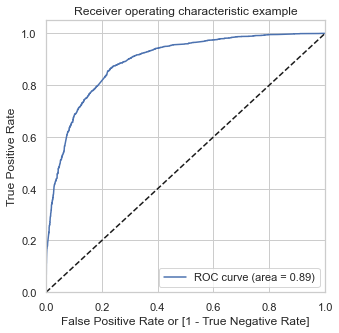

In [132]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob)

***We can see that the area under the curve is `0.89` for our model and this value leans towards 1. The more close it is to 1, the better the model will be. From our value of `0.89` we can conclude that this is a fair predictive model.*** 

### Step 6.3: Finding the Optimal Cut-off Point

- As mentioned earlier that we chose `0.5` as an arbitrary cutoff/threshold and it not final. 
- Hence we will be finding our the ***Optimal cutoff probability*** for our model
- ***Optimal cutoff probability*** is that prob where we get balanced sensitivity and specificity

In [133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.722292,1943,1,1,1,1,1,1,1,1,1,0,0
1,0,0.010877,456,0,1,0,0,0,0,0,0,0,0,0
2,0,0.507893,6547,1,1,1,1,1,1,1,0,0,0,0
3,0,0.700209,8836,1,1,1,1,1,1,1,1,1,0,0
4,1,0.958878,6529,1,1,1,1,1,1,1,1,1,1,1


In [134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificty'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificty
0.0          0.0  0.373799     1.000000    0.000000
0.1          0.1  0.620690     0.974305    0.409605
0.2          0.2  0.761927     0.917860    0.668846
0.3          0.3  0.802866     0.867734    0.764144
0.4          0.4  0.815462     0.763690    0.846367
0.5          0.5  0.817509     0.689975    0.893638
0.6          0.6  0.808849     0.623842    0.919286
0.7          0.7  0.783814     0.513901    0.944933
0.8          0.8  0.764132     0.422915    0.967815
0.9          0.9  0.716423     0.263269    0.986925


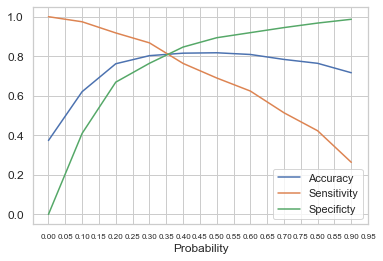

In [135]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificty'])
plt.xticks(np.arange(0,1,step=.05), size=8)
plt.yticks(size=12)
plt.show()

### Summary: 
- We can clearly see from the above plot that `0.35` seems to be the optimal cutoff point where ***Accuracy, Sensitivity & Specificity*** are well balanced.

In [136]:
# Doing the final prediction based on the optimal cutoff received above
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.722292,1943,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.010877,456,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.507893,6547,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.700209,8836,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.958878,6529,1,1,1,1,1,1,1,1,1,1,1,1


In [137]:
#Assigning lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Lead_Score_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.722292,1943,1,1,1,1,1,1,1,1,1,0,0,1,72
1,0,0.010877,456,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0.507893,6547,1,1,1,1,1,1,1,0,0,0,0,1,51
3,0,0.700209,8836,1,1,1,1,1,1,1,1,1,0,0,1,70
4,1,0.958878,6529,1,1,1,1,1,1,1,1,1,1,1,1,96


In [138]:
# Let's check the overall accuracy of the model again
print(f"Accuracy Score: {round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100,2)} %")

Accuracy Score: 80.9 %


In [139]:
# Making the confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3243,  734],
       [ 479, 1895]], dtype=int64)

In [140]:
# Predicted      Not_Converted    Converted
# Actual
# not_converted      3243           734
# converted          479           1895  

In [141]:
# Let's check the overall accuracy.
print(f"Accuracy: {round(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100,2)} %")

Accuracy: 80.9 %


In [142]:
# Assigning the Positives and Negatives
TP = confusion2[1,1] # True Positive 
TN = confusion2[0,0] # True Negatives
FP = confusion2[0,1] # False Positives
FN = confusion2[1,0] # False Negatives

In [143]:
# Let us calculate sensitivity of our Logistic Regression Model ( Recall ) 
print(f"Sensitivity: {round(TP/float(TP+FN),2)}")

Sensitivity: 0.8


In [144]:
# Let us calculate specificity
print(f"Specificity: {round(TN/float(TN+FP),2)}")

Specificity: 0.82


In [145]:
# Calculating the false postive rate - predicting conversion when lead has not converted
print(f"False Positive Rate: {round(FP/float(TN+FP)*100,2)} %")

False Positive Rate: 18.46 %


In [146]:
# positive predictive value ( Precision ) 
print (f"Positive Predictive Rate: {round(TP/float(TP+FP),4)}")

Positive Predictive Rate: 0.7208


In [147]:
# Negative predictive value
print (f"Negative Predictive Value: {round(TN/float(TN+ FN),4)}")

Negative Predictive Value: 0.8713


### Summary: 
- We can see from the above results that at the optimal cutoff of `0.35` the Sensitivity, Specificity and the Accuracy are all above 80%. 
- Based on these stats we can say that our model is good as per the industry standards. 

### Step 6.4: Precision and Recall

- Precision and Recall are two most commonly used metrics in the industry to decide model performance and build business understanding. 
- They tell us the result relevancy of the model

In [148]:
#Calculating Precision 
print (f"Precision: {round(TP/float(TP+FP),2)}")

Precision: 0.72


In [149]:
#calculating Recall 
print(f"Recall: {round(TP/float(TP+FN),2)}")

Recall: 0.8


In [150]:
#Calculating precision using precision_score function from sklearn
print(round(precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted),2))

0.72


In [151]:
#Calculating recall using recall_score function from sklearn
print(round(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2))

0.8


### Summary: 
- Recall is also know as sensitivity and we don't want any leads who want to be converted to be left out. 
- Hence we can say that an 80% recall rate suggests a good model.

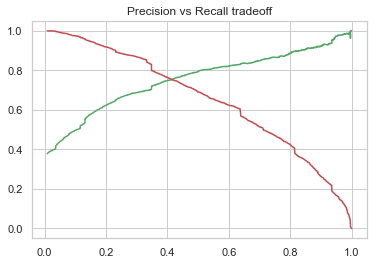

In [152]:
#Let us generate the Precision vs Recall tradeoff curve 
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Lead_Score_Prob)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

### Summary: 
- We can see that Precision and Recall are inversely proportional and if one increases the other will decrease which suggests that there is tradeoff between the two. 

## Step 7: Making Predictions on the Test Set

In [153]:
# Scalling the continuous variables of the Test Dataset using a Standard Scaler Object
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [154]:
# Assigning only those columns to the test set which we have decided after feature elimination
X_test = X_test[col6]
X_test.shape

(2723, 14)

In [155]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,What is your current occupation_mode_1,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
465,0,-0.250009,0,0,0,0,0,0,0,0,1,0,1,0
5424,0,0.361195,0,0,0,0,0,0,0,0,0,0,1,0
3503,0,-0.892323,0,1,0,0,0,0,0,0,0,0,1,0
4465,0,-0.892323,0,1,0,0,0,1,0,0,0,0,1,0
5394,0,-0.592210,0,1,0,0,0,0,0,0,1,0,1,0


In [156]:
# Adding a constant 
X_test_sm = sm.add_constant(X_test)

#making predictions on test set
y_test_pred = res.predict(X_test_sm)

#Printing the first 10 rows on the prediction set
y_test_pred[:10]

465     0.044276
5424    0.244969
3503    0.231476
4465    0.115933
5394    0.106935
7831    0.052936
2314    0.862640
7042    0.935336
5428    0.131543
4349    0.257073
dtype: float64

In [157]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
465,0.044276
5424,0.244969
3503,0.231476
4465,0.115933
5394,0.106935


In [158]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [159]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [160]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [161]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,465,0.044276
1,0,5424,0.244969
2,0,3503,0.231476
3,0,4465,0.115933
4,0,5394,0.106935


In [162]:
# Renaming the column '0'

y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Score_Prob'})

In [163]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Lead_Score_Prob'], axis=1)

In [164]:
# Adding Lead_Score column

y_pred_final['Lead_Score'] = round((y_pred_final['Lead_Score_Prob'] * 100),0)

#Converting the values to integer from float
y_pred_final['Lead_Score'] = y_pred_final['Lead_Score'].astype(int)

In [165]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score
0,465,0,0.044276,4
1,5424,0,0.244969,24
2,3503,0,0.231476,23
3,4465,0,0.115933,12
4,5394,0,0.106935,11


In [166]:
# Mapping the Lead Score for final Prediction based on the cutoff value '0.35'
y_pred_final['final_Predicted'] = y_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [167]:
y_pred_final.head()


,Prospect ID,Converted,Lead_Score_Prob,Lead_Score,final_Predicted
0,465,0,0.044276,4,0
1,5424,0,0.244969,24,0
2,3503,0,0.231476,23,0
3,4465,0,0.115933,12,0
4,5394,0,0.106935,11,0


In [168]:
#classifying leads based on Lead score
y_pred_final['Lead_Type'] = y_pred_final.Lead_Score.map(lambda x: 'Hot Lead' if x >35 else 'Cold Lead')
y_pred_final.sort_values(by='Lead_Score', ascending = False)

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score,final_Predicted,Lead_Type
451,6933,1,0.995545,100,1,Hot Lead
716,2461,1,0.995545,100,1,Hot Lead
1345,8293,1,0.999224,100,1,Hot Lead
2113,7234,1,0.997050,100,1,Hot Lead
1352,6937,1,0.995545,100,1,Hot Lead
...,...,...,...,...,...,...
847,5392,0,0.004918,0,0,Cold Lead
1826,1835,0,0.003515,0,0,Cold Lead
1473,5381,0,0.004040,0,0,Cold Lead
1229,7786,0,0.004861,0,0,Cold Lead


In [169]:
# Creating a confusion matrix for the test set
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion3

array([[1349,  313],
       [ 216,  845]], dtype=int64)

In [170]:
# Predicted      Not_Converted    Converted
# Actual
# not_converted      1349           313
# converted          216            845  

In [171]:
# Let's check the overall accuracy.
print(f"Accuracy: {round(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100,2)} %")

Accuracy: 80.9 %


In [172]:
# Assigning the Positives and Negatives
TP = confusion3[1,1] # True Positive 
TN = confusion3[0,0] # True Negatives
FP = confusion3[0,1] # False Positives
FN = confusion3[1,0] # False Negatives

In [173]:
# Let us calculate sensitivity of our Logistic Regression Model ( Recall ) 
print(f"Sensitivity: {round(TP/float(TP+FN),2)}")

Sensitivity: 0.8


In [174]:
# Let us calculate specificity
print(f"Specificity: {round(TN/float(TN+FP),2)}")

Specificity: 0.81


In [175]:
# Calculating the false postive rate - predicting conversion when lead has not converted
print(f"False Positive Rate: {round(FP/float(TN+FP)*100,2)} %")

False Positive Rate: 18.83 %


In [176]:
# positive predictive value ( Precision ) 
print (f"Positive Predictive Rate: {round(TP/float(TP+FP),4)}")

Positive Predictive Rate: 0.7297


In [177]:
# Negative predictive value
print (f"Negative Predictive Value: {round(TN/float(TN+ FN),4)}")

Negative Predictive Value: 0.862


In [178]:
#Calculating precision using precision_score function from sklearn
print(f"Precision: {round(precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted),2)}")

Precision: 0.72


In [179]:
#Calculating recall using recall_score function from sklearn
print(f"Recall: {round(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)}")

Recall: 0.8


### Final Summary: 
Comparison between the metrics of the train set and the test set

|Metric                  | Train Data | Test Data |
|------------------------|------------|-----------|
|`Accuracy`              |   80.9%    |   80.9%   |
|`Sensitivity`           |    80%     |    80%    |
|`Specificity`           |    82%     |    81%    |
|`False Positive rate`   |   18.46%   |   18.83%  |
|`Precision`             |    72%     |    72%    |
|`Recall`                |    80%     |    80%    |

- We got similar `accuracy` on train and test data's performance metrics which implies that our final model didn't overfit on the training data and is performing well.

- Higher `sensitivity` will ensure that the leads who are likely to get Convert are correctly predicted where as high `Specificity` will ensure that the leads that have a lower probability of getting converted are not selected.

- Depending on the business requirement, we can increase or decrease the probability threshold value which in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model.

### Determining Feature Importance: 
- Selecting the coefficients of the selected features from our final model excluding the intercept

In [180]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.27
Total Time Spent on Website                             1.12
Lead Origin_Lead Add Form                               3.44
Lead Source_Olark Chat                                  1.33
Lead Source_Welingak Website                            2.75
Last Activity_Converted to Lead                        -0.81
Last Activity_Email Bounced                            -0.98
Last Activity_Olark Chat Conversation                  -0.83
Last Activity_SMS Sent                                  1.19
What is your current occupation_Working Professional    2.56
What is your current occupation_mode_1                 -1.26
Last Notable Activity_Had a Phone Conversation          3.11
Last Notable Activity_Modified                         -0.57
Last Notable Activity_Unreachable                       2.02
dtype: float64

In [181]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -36.90
Total Time Spent on Website                             32.71
Lead Origin_Lead Add Form                              100.00
Lead Source_Olark Chat                                  38.84
Lead Source_Welingak Website                            79.95
Last Activity_Converted to Lead                        -23.46
Last Activity_Email Bounced                            -28.49
Last Activity_Olark Chat Conversation                  -24.21
Last Activity_SMS Sent                                  34.62
What is your current occupation_Working Professional    74.65
What is your current occupation_mode_1                 -36.67
Last Notable Activity_Had a Phone Conversation          90.45
Last Notable Activity_Modified                         -16.66
Last Notable Activity_Unreachable                       58.79
dtype: float64

In [182]:
#Sorting the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                             0
Total Time Spent on Website                             10
Lead Origin_Lead Add Form                                6
Lead Source_Olark Chat                                   7
Lead Source_Welingak Website                             5
Last Activity_Converted to Lead                         12
Last Activity_Email Bounced                              1
Last Activity_Olark Chat Conversation                    8
Last Activity_SMS Sent                                   3
What is your current occupation_Working Professional    13
What is your current occupation_mode_1                   9
Last Notable Activity_Had a Phone Conversation           4
Last Notable Activity_Modified                          11
Last Notable Activity_Unreachable                        2
dtype: int64

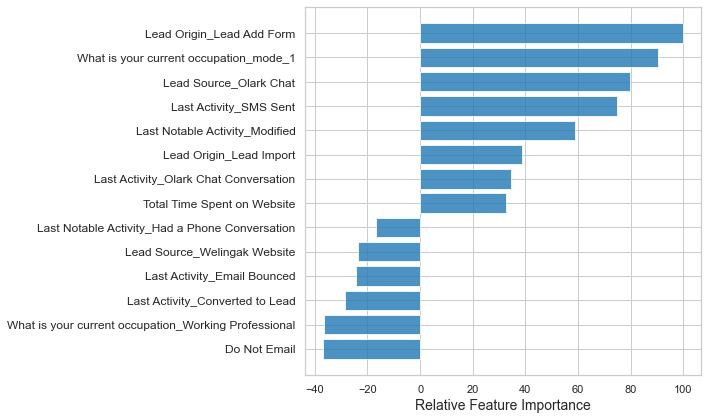

In [183]:
##Plot showing the feature variables based on their relative coefficient values

pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col5].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

## Formula and Final Equation for calculating Log Odds:  

$
log\frac{P}{1-P} = \beta_0 + \sum \limits _{i=1} ^{n} {\beta_i}{X_i}
$

$LogOdds = -0.96 + (-1.27 * Do Not Email) + (1.12 * Total Time Spent on Website) + (3.44 * Lead Origin-Lead Add Form) + (1.33 * Lead Source-Olark Chat) + (2.75 * Lead Source-Welingak Website) + (-0.81 * Last Activity-Converted to Lead) + (-0.98 * Last Activity-Email Bounced) + (-0.83 * Last Activity-Olark Chat Conversation) + (1.19 * Last Activity-SMS Sent) + (2.56 * What is your current occupation-Working Professional) + (-1.26 * What is your current occupation-mode1) + (3.11 * Last Notable Activity-Had a Phone Conversation) + (-0.57 * Last Notable Activity-Modified) + (-0.57 * Last Notable Activity-Modified) + (2.02 * Last Notable Activity-Unreachable) $

## Point's to Note for X Education: 

- X-Education should focus on leads having ***Lead Origin*** as `Lead Add Form` , ***Occupation*** as `Working Professional` , ***Lead Source*** as `Wellingak Website` and ***Last Notable Activity*** as `Had a Phone Conversation`.

- We have categorized all the leads as either `Hot Leads` or `Cold Leads`. Hot Leads are those having a Lead Score of more than 35. The sales team should give priority to `Hot Leads`. 

- `Location`, `Specialization`, `Occupation` are a few variables that can probably help the company determine the nature and/or behaviour of the leads a little better. This can help in deteremining the quality of lead and the company should be able to categorize the leads in `Hot` and `Cold`. In order to utilize these variables, the company should make these variables mandatory for the users to fill on the platform. 

- The company could also have a section on their platform which asks the users whether they would like to receive a callback and those who opt ***Yes*** will have a higher probability of converting, hence the company should focus on those leads more. 

- Our Model has a higher recall score than precision which suggests that this model can adjust with X-Education’s requirements in coming future.

- We could also see that visitors who have spent a higher time on the website were more likely to convert than the users who have spent less time. 

- We can also see that users having ***Last Activity*** as `SMS Sent` are more likely to convert than those who have a ***Last Activity*** as `Email Bounced` or `Modified`.  

- Users who ***Don't Want to be Called or Emailed*** are very less likely to convert, hence the company should not put their primary focus on such users. 


